In [2]:
pip install pyAudioAnalysis

     |████████████████████████████████| 41.3 MB 2.0 MB/s 
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264389 sha256=036dd3621a40224e5955b49e0e4992b4127a95a8d9213743e72de31691fb49fe
  Stored in directory: /root/.cache/pip/wheels/85/b4/52/c6a5bdc8517a9bc4cc95aca9839f118d25139aee7881a8d210
Successfully built pyAudioAnalysis


In [3]:
pip install eyed3

     |████████████████████████████████| 245 kB 3.8 MB/s 
     |████████████████████████████████| 242 kB 43.0 MB/s 
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 5.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 5.5 which is incompatible.


## We have considered as Chromagram as an important feature based on which the audios are analyzed and grouped into clusters of similar kind of taste. Like chorus and rock songs are grouped into one.

In [4]:
pip install pydub

In [5]:
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO 
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
!unzip /content/final_songs.zip

Archive:  /content/final_songs.zip
   creating: final_songs/
  inflating: final_songs/Green Day_Jesus_Of_Suburbia.wav  
  inflating: __MACOSX/final_songs/._Green Day_Jesus_Of_Suburbia.wav  
  inflating: final_songs/Megan Thee Stallion & Dua Lipa - Sweetest Pie [Official Video].wav  
  inflating: __MACOSX/final_songs/._Megan Thee Stallion & Dua Lipa - Sweetest Pie [Official Video].wav  
  inflating: final_songs/John Lee Hooker Boogie Chillen original 1948 version.wav  
  inflating: __MACOSX/final_songs/._John Lee Hooker Boogie Chillen original 1948 version.wav  
  inflating: final_songs/Garth Brooks - The Dance (With Lyrics).wav  
  inflating: __MACOSX/final_songs/._Garth Brooks - The Dance (With Lyrics).wav  
  inflating: final_songs/Green Day-American Idiot.wav  
  inflating: __MACOSX/final_songs/._Green Day-American Idiot.wav  
  inflating: final_songs/One Direction_What_Makes_You_Beautiful.wav  
  inflating: __MACOSX/final_songs/._One Direction_What_Makes_You_Beautiful.wav  
  infla

## Preprocessing the data

In [7]:
def PreProcessing_audio( fileName ):
    
    # Extracting wav file data
    [fq, x] = audioBasicIO.read_audio_file(fileName);
    print("fs",fq)
    print('x',x.shape)

    # If double channel data then take mean
    if( len( x.shape ) > 1 and  x.shape[1] == 2 ):
        x = np.mean( x, axis = 1, keepdims = True )
    else:
        x = x.reshape( x.shape[0], 1 )
    
    # Extract the raw chromagram data, expected dimention is [ m,  ] not [ m, 1 ]
    F, f_names = ShortTermFeatures.feature_extraction(
        x[ :, 0 ], 
        fq, 0.050*fq, 
        0.025*fq
    )
    return (f_names, F)

## Function to stack all the Chromogram values one below the other

In [8]:
def getChromagram( audioData ):

    temp_data =  audioData[ 21 ].reshape( 1, audioData[ 21 ].shape[0] )
    chronograph = temp_data
    
    # looping through the next 11 stacking them vertically
    for i in range( 22, 33 ):
        temp_data =  audioData[ i ].reshape( 1, audioData[ i ].shape[0] )
        chronograph = np.vstack( [ chronograph,  temp_data ] )
    
    return chronograph

## Finding frequency with which each note was hit. Finding the optimal values vertical

In [9]:
def getNoteFrequency( chromagram ):
    nbin=12
    # Total number of time frames in the current sample
    numberOfWindows = chromagram.shape[1]
    
    # Taking the note with the highest amplitude
    freqVal = chromagram.argmax( axis = 0 )
    
    # Converting the freqVal vs time to freq count
    histogram, bin = np.histogram( freqVal, bins = nbin ) 
    
    # Normalizing the distribution by the number of time frames
    normalized_hist = histogram.reshape( 1, nbin ).astype( float ) / numberOfWindows
    
    return normalized_hist

## Generating the Pandas Dataframe

In [10]:
fileList=[]
def getDataset( filePath ):
    X = pd.DataFrame(  )
    
    #12 notes of music
    columns=[ "G#", "G", "F#", "F", "E", "D#", "D", "C#", "C", "B", "A#", "A" ]
    f_list=[]
    for root, dirs, filenames in os.walk( filePath ):
        for file in filenames:
            fileList.append( file )
            print(file)
            f_list.append(file)
            try:
              feature_name, features = PreProcessing_audio(filePath + file )
              
            except:
              continue
            chromagram = getChromagram( features )
            noteFrequency = getNoteFrequency( chromagram )
            x_new =  pd.Series(noteFrequency[ 0, : ])
            X = pd.concat( [ X, x_new ], axis = 1 )
        
    data = X.T.copy()
    data.columns = columns
    data.index = [ i for i in range( 0, data.shape[ 0 ] ) ]
            
    return data, f_list

In [11]:
import os
data, feature_name1 = getDataset('./final_songs/')

Carrie Underwood - Before He Cheats (Official Video).wav
fs 48000
x (9507179, 2)
Miley_Cyrus_Party_In_The_USA.wav
fs 48000
x (9942414, 2)
My_Chemical_Romance_Teenagers.wav
fs 48000
x (8238812, 2)
Green Day-American Idiot.wav
fs 48000
x (8749279, 2)
Garth Brooks - The Dance (With Lyrics).wav
fs 48000
x (11233629, 2)
Eminem - Without Me (Official Music Video).wav
fs 48000
x (14284731, 2)
Green Day_Jesus_Of_Suburbia.wav
fs 48000
x (26198239, 2)
SALT N PEPA ( PUSH IT ) JACKS EXTENDED MIX.wav
fs 48000
x (32256976, 2)
Megan Thee Stallion & Dua Lipa - Sweetest Pie [Official Video].wav
fs 48000
x (10402726, 2)
Garth Brooks- Friends In Low Places.wav
fs 48000
x (12668622, 2)
One Direction_What_Makes_You_Beautiful.wav
fs 48000
x (9908420, 2)
Sia_Chandelier.wav
fs 48000
x (11103226, 2)
John Lee Hooker Boogie Chillen original 1948 version.wav
fs 48000
x (9126000, 2)
Little Walter And His Jukes  My Babe  CHECKER 811.wav
fs 48000
x (7779057, 2)
The Thrill Is Gone.wav
fs 48000
x (15587200, 2)


In [12]:
data

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A
0,0.076505,0.034970,0.222194,0.067668,0.081050,0.068426,0.151749,0.007449,0.009595,0.122838,0.132812,0.024744
1,0.010864,0.017866,0.329913,0.011226,0.078223,0.023901,0.170087,0.000845,0.019073,0.036577,0.290922,0.010502
2,0.093094,0.007721,0.255390,0.030449,0.128642,0.018794,0.176573,0.003934,0.024767,0.060897,0.182838,0.016900
3,0.012346,0.005487,0.394787,0.010425,0.039232,0.005213,0.317833,0.002743,0.004390,0.044719,0.154047,0.008779
4,0.065385,0.023184,0.164744,0.050748,0.064530,0.016026,0.338034,0.001816,0.013355,0.055769,0.195833,0.010577
5,0.004537,0.000672,0.655772,0.001932,0.008654,0.004369,0.169551,0.001176,0.001344,0.014451,0.137120,0.000420
6,0.072836,0.002428,0.392075,0.008658,0.066285,0.013559,0.272240,0.003161,0.012872,0.031012,0.114201,0.010673
7,0.036683,0.009041,0.322631,0.029317,0.098478,0.016035,0.237100,0.008148,0.020127,0.046951,0.162952,0.012538
8,0.041768,0.013961,0.377178,0.042806,0.041883,0.049498,0.247952,0.013730,0.032883,0.063574,0.066344,0.008423
9,0.007673,0.012978,0.430656,0.034767,0.024631,0.028799,0.307787,0.001516,0.010136,0.008715,0.131110,0.001232


In [13]:
col=data.columns
col

Index(['G#', 'G', 'F#', 'F', 'E', 'D#', 'D', 'C#', 'C', 'B', 'A#', 'A'], dtype='object')

In [14]:
feature_name1

['Carrie Underwood - Before He Cheats (Official Video).wav',
 'Miley_Cyrus_Party_In_The_USA.wav',
 'My_Chemical_Romance_Teenagers.wav',
 'Green Day-American Idiot.wav',
 'Garth Brooks - The Dance (With Lyrics).wav',
 'Eminem - Without Me (Official Music Video).wav',
 'Green Day_Jesus_Of_Suburbia.wav',
 'SALT N PEPA ( PUSH IT ) JACKS EXTENDED MIX.wav',
 'Megan Thee Stallion & Dua Lipa - Sweetest Pie [Official Video].wav',
 'Garth Brooks- Friends In Low Places.wav',
 'One Direction_What_Makes_You_Beautiful.wav',
 'Sia_Chandelier.wav',
 'John Lee Hooker Boogie Chillen original 1948 version.wav',
 'Little Walter And His Jukes  My Babe  CHECKER 811.wav',
 'The Thrill Is Gone.wav']

## Using elbow method to find optimal value of k

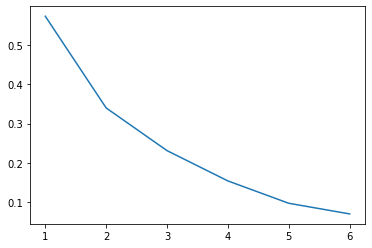

In [15]:
#Using elbow method to find optimal value of k
X=data
errors = []
ks = []
for k in range(1,7):
  kmeans_ob=KMeans(n_clusters=k)
  kmeans_ob.fit(X)
  error = kmeans_ob.inertia_
  ks.append(k)
  errors.append(error)

plt.plot(ks,errors)
plt.show()

In [16]:
kmeans_ob1=KMeans(n_clusters=2)
model=kmeans_ob1.fit(X)
kmeans_ob1.labels_

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [17]:
len(list(kmeans_ob1.labels_))

15

In [18]:
len(feature_name1)

15

## Generating the labelled dataframe of clusters



In [19]:
dic = {"Labels":list(kmeans_ob1.labels_),"data":feature_name1}
import pandas as pd
df = pd.DataFrame(dic)
df

,Labels,data
0,0,Carrie Underwood - Before He Cheats (Official ...
1,0,Miley_Cyrus_Party_In_The_USA.wav
2,0,My_Chemical_Romance_Teenagers.wav
3,1,Green Day-American Idiot.wav
4,0,Garth Brooks - The Dance (With Lyrics).wav
5,1,Eminem - Without Me (Official Music Video).wav
6,1,Green Day_Jesus_Of_Suburbia.wav
7,0,SALT N PEPA ( PUSH IT ) JACKS EXTENDED MIX.wav
8,1,Megan Thee Stallion & Dua Lipa - Sweetest Pie ...
9,1,Garth Brooks- Friends In Low Places.wav


## Even though when we have considered genre of songs like hiphop, blue, country music, rock, chorus. Based on the number of times a note has been hit. We are clustering them into similar clusters. For example band Green day's songs were classified into one cluster which is true, where as hiphop songs which shares the similar kind of notes as rock songs are also classified into one cluster. We can make better predictions if we have more number of songs available to analyze, but loading the songs and processing on it, takes a lot of computation time.

In [20]:
data_new=data
data_new['labels']=df['Labels']
data_new

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A,labels
0,0.076505,0.034970,0.222194,0.067668,0.081050,0.068426,0.151749,0.007449,0.009595,0.122838,0.132812,0.024744,0
1,0.010864,0.017866,0.329913,0.011226,0.078223,0.023901,0.170087,0.000845,0.019073,0.036577,0.290922,0.010502,0
2,0.093094,0.007721,0.255390,0.030449,0.128642,0.018794,0.176573,0.003934,0.024767,0.060897,0.182838,0.016900,0
3,0.012346,0.005487,0.394787,0.010425,0.039232,0.005213,0.317833,0.002743,0.004390,0.044719,0.154047,0.008779,1
4,0.065385,0.023184,0.164744,0.050748,0.064530,0.016026,0.338034,0.001816,0.013355,0.055769,0.195833,0.010577,0
5,0.004537,0.000672,0.655772,0.001932,0.008654,0.004369,0.169551,0.001176,0.001344,0.014451,0.137120,0.000420,1
6,0.072836,0.002428,0.392075,0.008658,0.066285,0.013559,0.272240,0.003161,0.012872,0.031012,0.114201,0.010673,1
7,0.036683,0.009041,0.322631,0.029317,0.098478,0.016035,0.237100,0.008148,0.020127,0.046951,0.162952,0.012538,0
8,0.041768,0.013961,0.377178,0.042806,0.041883,0.049498,0.247952,0.013730,0.032883,0.063574,0.066344,0.008423,1
9,0.007673,0.012978,0.430656,0.034767,0.024631,0.028799,0.307787,0.001516,0.010136,0.008715,0.131110,0.001232,1


I was trying to plot a scatterplot of each notes with each other. Inorder to

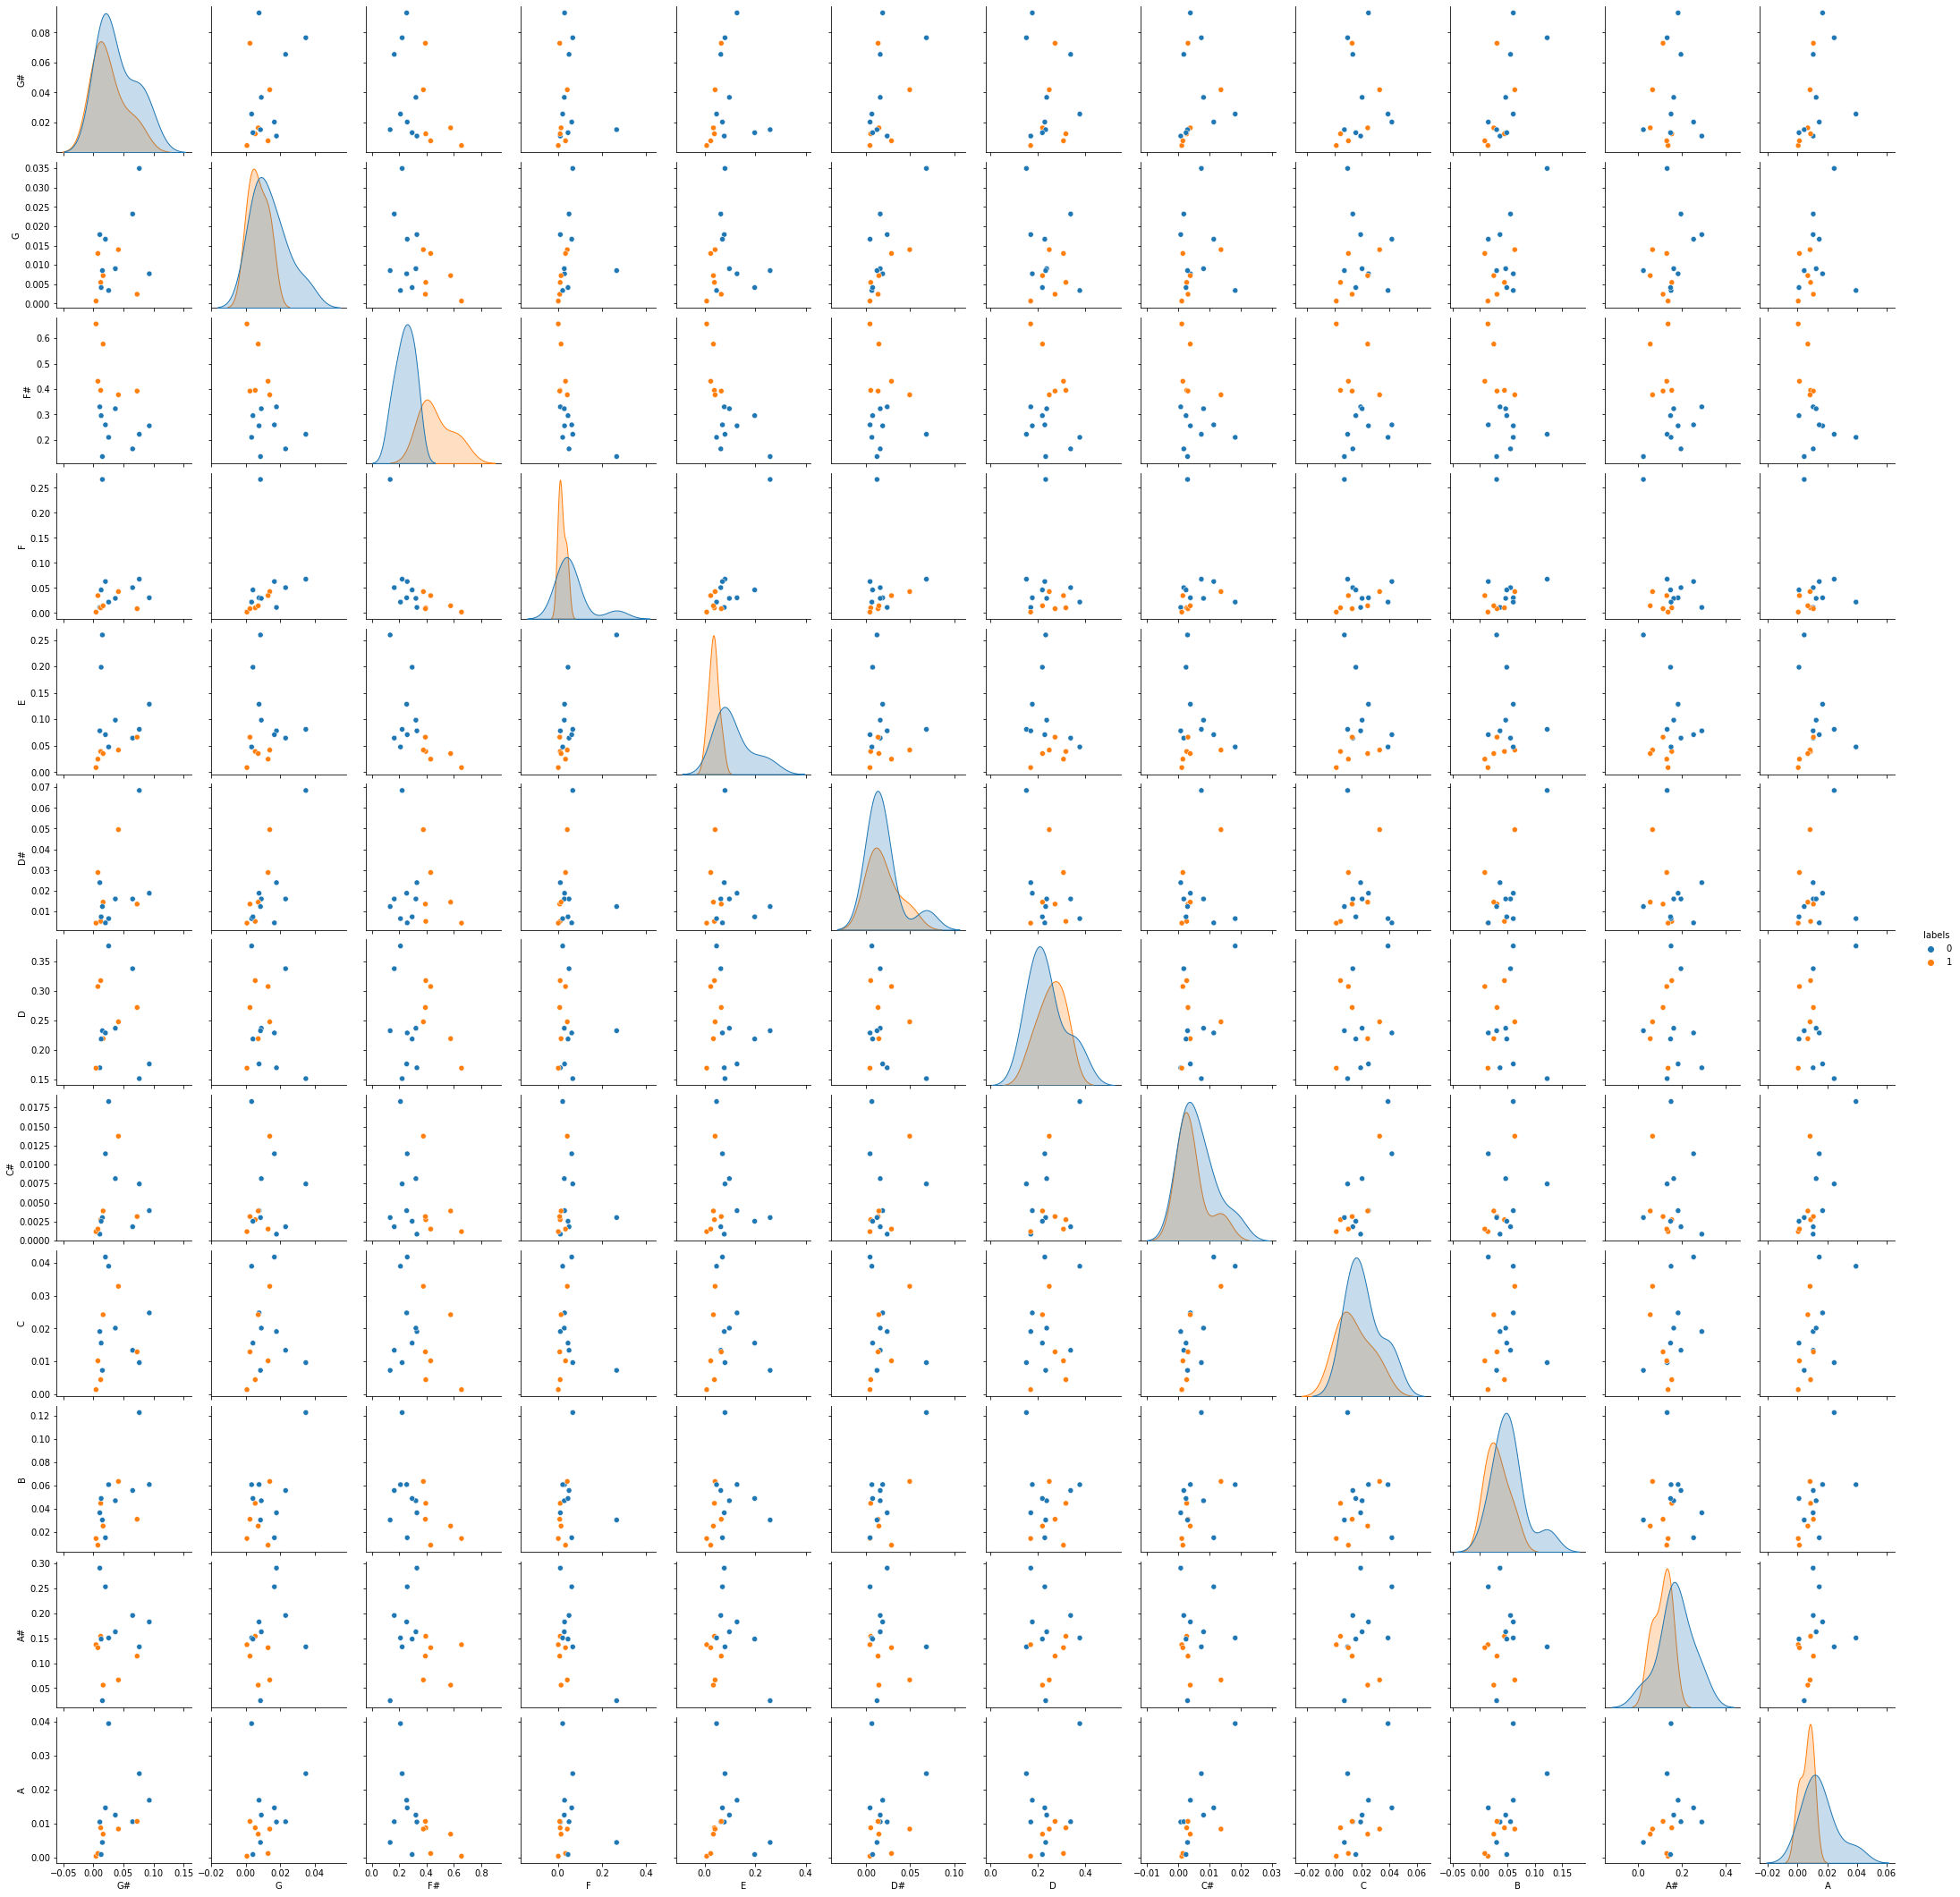

In [21]:
import seaborn as sns
#Using Seaborn plotting a pairplot each node with respect to each other.
sns.pairplot(data_new, hue='labels')

References:
1. https://python.hotexamples.com/examples/pyAudioAnalysis.audioFeatureExtraction/-/stFeatureExtraction/python-stfeatureextraction-function-examples.html
2. https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225
3. https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8